<a href="https://colab.research.google.com/github/sharadk11/90DaysOfDevOps/blob/master/Copy_of_car_dealer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install SQL extension
!pip install -q ipython-sql

# Load the SQL extension
%load_ext sql

# Create an in-memory SQLite database
%sql sqlite://


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving automobile_data.csv to automobile_data.csv


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Replace with your uploaded filename
df = pd.read_csv('automobile_data.csv')

# Show preview
display(df.head())

# Create SQLAlchemy engine for a persistent database file
engine = create_engine('sqlite:///my_data.db')

# Load into SQLite persistent DB
df.to_sql('car_deal', con=engine, index=False, if_exists='replace')

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


203

In [ ]:
from sqlalchemy import inspect

inspector = inspect(engine)
print(inspector.get_table_names())


['car_deal']


In [ ]:
query = """
SELECT
  num_of_doors
FROM car_deal
WHERE make = 'mazda'
"""

df = pd.read_sql_query(query, con=engine)
print(df)

   num_of_doors
0           two
1           two
2           two
3          four
4          four
5           two
6           two
7           two
8           two
9           two
10         four
11          two
12         four
13         None
14         four
15         four
16         four


In [ ]:
query = """
SELECT
  MIN(length) AS min_length,
  MAX(length) AS max_length
FROM car_deal

"""

df = pd.read_sql_query(query, con=engine)
print(df)

   min_length  max_length
0       141.1       208.1


In [ ]:
import pandas as pd

# Use a dummy SELECT to get just the schema
df = pd.read_sql("SELECT * FROM car_deal LIMIT 0", con=engine)
print(df.dtypes)


make                 object
fuel_type            object
num_of_doors         object
body_style           object
drive_wheels         object
engine_location      object
wheel_base           object
length               object
width                object
height               object
curb_weight          object
engine_type          object
num_of_cylinders     object
engine_size          object
fuel_system          object
compression_ratio    object
horsepower           object
city_mpg             object
highway_mpg          object
price                object
dtype: object


In [ ]:
query = """
SELECT
  *
FROM car_deal
WHERE
  num_of_doors IS NULL
"""

df = pd.read_sql_query(query, con=engine)
print(df)

    make fuel_type num_of_doors body_style drive_wheels engine_location  \
0  dodge       gas         None      sedan          fwd           front   
1  mazda    diesel         None      sedan          fwd           front   

   wheel_base  length  width  height  curb_weight engine_type  \
0        93.7   157.3   63.8    50.6         2191         ohc   
1        98.8   177.8   66.5    55.5         2443         ohc   

  num_of_cylinders  engine_size fuel_system  compression_ratio  horsepower  \
0             four           98        mpfi                7.6         102   
1             four          122         idi               22.7          64   

   city_mpg  highway_mpg  price  
0        24           30   8558  
1        36           42  10795  


In [ ]:
from sqlalchemy import text

query = """
UPDATE car_deal
SET num_of_doors = 'four'
WHERE num_of_doors IS NULL
LIMIT 10
"""

with engine.begin() as conn:
    conn.execute(text(query))  # Automatically commits


df = pd.read_sql_query("SELECT * FROM car_deal", con=engine)
print(df)

            make fuel_type num_of_doors   body_style drive_wheels  \
0    alfa-romero       gas          two  convertible          rwd   
1    alfa-romero       gas          two  convertible          rwd   
2    alfa-romero       gas          two    hatchback          rwd   
3           audi       gas         four        sedan          fwd   
4           audi       gas         four        sedan         4wd    
..           ...       ...          ...          ...          ...   
198        volvo       gas         four        sedan          rwd   
199        volvo       gas         four        sedan          rwd   
200        volvo       gas         four        sedan          rwd   
201        volvo    diesel         four        sedan          rwd   
202        volvo       gas         four        sedan          rwd   

    engine_location  wheel_base  length  width  height  curb_weight  \
0             front        88.6   168.8   64.1    48.8         2548   
1             front        88

In [ ]:
query = """
SELECT
  *
FROM car_deal
WHERE
  num_of_doors IS NULL
"""

df = pd.read_sql_query(query, con=engine)
print(df)

Empty DataFrame
Columns: [make, fuel_type, num_of_doors, body_style, drive_wheels, engine_location, wheel_base, length, width, height, curb_weight, engine_type, num_of_cylinders, engine_size, fuel_system, compression_ratio, horsepower, city_mpg, highway_mpg, price]
Index: []


In [ ]:
query = """
SELECT DISTINCT make, fuel_type, num_of_doors, body_style, drive_wheels
FROM car_deal
"""
df = pd.read_sql_query(query, con=engine)
print(df)

           make fuel_type num_of_doors   body_style drive_wheels
0   alfa-romero       gas          two  convertible          rwd
1   alfa-romero       gas          two    hatchback          rwd
2          audi       gas         four        sedan          fwd
3          audi       gas         four        sedan         4wd 
4          audi       gas          two        sedan          fwd
..          ...       ...          ...          ...          ...
87   volkswagen       gas          two    hatchback          fwd
88   volkswagen       gas         four        wagon          fwd
89        volvo       gas         four        sedan          rwd
90        volvo       gas         four        wagon          rwd
91        volvo    diesel         four        sedan          rwd

[92 rows x 5 columns]


In [ ]:
query = """
SELECT *
FROM car_deal
"""
df = pd.read_sql_query(query, con=engine)
print(df)

            make fuel_type num_of_doors   body_style drive_wheels  \
0    alfa-romero       gas          two  convertible          rwd   
1    alfa-romero       gas          two  convertible          rwd   
2    alfa-romero       gas          two    hatchback          rwd   
3           audi       gas         four        sedan          fwd   
4           audi       gas         four        sedan         4wd    
..           ...       ...          ...          ...          ...   
198        volvo       gas         four        sedan          rwd   
199        volvo       gas         four        sedan          rwd   
200        volvo       gas         four        sedan          rwd   
201        volvo    diesel         four        sedan          rwd   
202        volvo       gas         four        sedan          rwd   

    engine_location  wheel_base  length  width  height  curb_weight  \
0             front        88.6   168.8   64.1    48.8         2548   
1             front        88

In [ ]:

query = """
SELECT price, LENGTH(price) AS price_length
FROM car_deal
"""
df = pd.read_sql_query(query, con=engine)
print(df)

     price  price_length
0    13495             5
1    16500             5
2    16500             5
3    13950             5
4    17450             5
..     ...           ...
198  16845             5
199  19045             5
200  21485             5
201  22470             5
202  22625             5

[203 rows x 2 columns]


/tmp/ipython-input-1867265970.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='wheel_base', y='body_style', inner='stick', palette='Dark2')


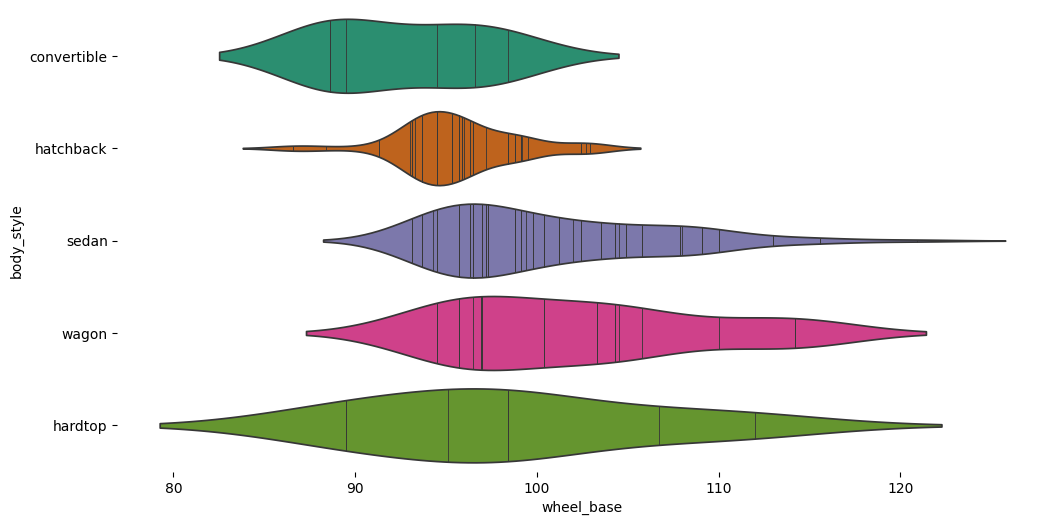

In [ ]:
# @title body_style vs wheel_base

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['body_style'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='wheel_base', y='body_style', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Connect to SQLite database
engine = create_engine('sqlite:///my_data.db')

# Run SQL query
query = "SELECT * FROM car_deal"
df = pd.read_sql_query(query, con=engine)

# Display all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # (Optional) Show all columns
pd.set_option('display.width', None)  # (Optional) Don't wrap lines
pd.set_option('display.max_colwidth', None)  # (Optional) Show full cell content

display(df)



,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.00,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.00,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.00,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.00,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.00,115,18,22,17450
5,audi,gas,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,8.50,110,19,25,15250
6,audi,gas,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,8.50,110,19,25,17710
7,audi,gas,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,8.50,110,19,25,18920
8,audi,gas,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,8.30,140,17,20,23875
9,audi,gas,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,7.00,160,16,22,0


In [ ]:
query = """
  SELECT price, LENGTH(price) as price_length
  FROM car_deal
  WHERE LENGTH(price) < 4
  """
df = pd.read_sql_query(query, con=engine)
print(df)

Empty DataFrame
Columns: [price, price_length]
Index: []


In [ ]:
from sqlalchemy import text

delete_query = """
  DELETE FROM car_deal
  WHERE LENGTH(price) < 4
  """
with engine.begin() as conn:
    conn.execute(text(delete_query))

In [ ]:
query = """
  SELECT
    DISTINCT drive_wheels,
    LENGTH(drive_wheels) as drive_wheels_length
    FROM car_deal
  """
df = pd.read_sql_query(query, con=engine)
print(df)

  drive_wheels  drive_wheels_length
0          rwd                    3
1          4wd                    3
2          fwd                    3


In [ ]:
query = """
  UPDATE
    car_deal
  SET
    drive_wheels = TRIM(drive_wheels)
  WHERE TRUE;
  """
with engine.begin() as conn:
    conn.execute(text(query))

In [ ]:
query = """
  SELECT
    MIN(compression_ratio) AS min_compression_ratio,
    MAX(compression_ratio) AS max_compression_ratio
  FROM
    car_deal
  """
df = pd.read_sql_query(query, con=engine)
print(df)

   min_compression_ratio  max_compression_ratio
0                    7.0                   23.0


In [ ]:
from sqlalchemy import text

query = """
  DELETE FROM car_deal
  WHERE
    compression_ratio = 70
  """
with engine.begin() as conn:
    conn.execute(text(query))

In [ ]:
# Install openpyxl if not already installed
!pip install openpyxl

# Export to Excel
df.to_excel('cleaned_car_deal.xlsx', index=False)

# Download the Excel file
from google.colab import files
files.download('cleaned_car_deal.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>